In [1]:
import gym
import matplotlib.pyplot as plt
import collections

C:\Users\Go\miniconda3\envs\tensorgpu\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


### q_learing_method

In [2]:
def play_random_steps(environ,t_count, reward_table, transit_table):   ## epsilon파트
    s = environ.reset()
    for _ in range(t_count):
        a = environ.action_space.sample()
        ns, r, done, info = environ.step(a)
        reward_table[(s,a,ns)] = r
        transit_table[(s,a)][ns] += 1
        s = environ.reset() if done else ns

def select_action(environ,value_table, state):   # greedy action을 취하는 target policy임, sarsa는 이조차 e-greedy임
    best_action, best_value = None, None
    
    for action in range(environ.action_space.n):
        # q value를 그때그때 계산해서 최댓값인 a를 액션으로 선택함 --> q learing과 차이/ qlenaring은 qvalue자체를 학습함
        action_value = value_table[(state, action)]
        if best_value is None or best_value < action_value:
            best_value = action_value
            best_action = action
    
    return best_action

def play_episode(environ, transit_table, reward_table, value_table):  ##greedy파트
    total_reward = 0.
    s = environ.reset()
    while True:
        a = select_action(environ,value_table, s)
        ns, r, done, info = environ.step(a)
        reward_table[(s, a, ns)] = r
        transit_table[(s,a)][ns] += 1
        total_reward += r
        if done:
            break
        s = ns
    return total_reward

def value_iteration(environ,transit_table, reward_table, value_table,):
    for state in range(environ.observation_space.n):
        for action in range(environ.action_space.n):
            action_value = 0.
            target_count = transit_table[(state, action)]
            total = sum(target_count.values())

            for tgt_state, count in target_count.items():

                r = reward_table[(state, action, tgt_state)]
                # print(r, count, total)
                best_action = select_action(environ,value_table, tgt_state)
                action_value += (count/total) * (r + gamma*value_table[(tgt_state, best_action)])  # 알파 0인상태라고 볼 수 있음
            value_table[(state, action)] = action_value
        

In [3]:
%%time
# action = 0 or 1 or 2 or 3
# reward는 도착을해야만 1을 받음 나머지는 0
# state는 0~16까지
env = gym.make("FrozenLake-v1", is_slippery = True)
# env.render()
gamma = 0.9
n_test_episode = 20
n_random_valueiter = 100

reward_table = collections.defaultdict(float)
transit_table = collections.defaultdict(collections.Counter)
value_table = collections.defaultdict(float)

r_cum = []
iter_no = 0
best_reward = 0.
while True:
    iter_no += 1
    play_random_steps(env, n_random_valueiter, reward_table, transit_table)
    value_iteration(env, transit_table, reward_table, value_table,)
    reward = 0
    for _ in range(n_test_episode):
        reward += play_episode(env, transit_table, reward_table,value_table)
    reward /= n_test_episode
    r_cum.append(reward)
    if reward > best_reward:
        print(f"best reward updated {best_reward} --> {reward}")
        best_reward = reward
    if reward > 0.8:
        print(f"solved in {iter_no} iterations!")
        break
    # print(f"iteration: {iter_no}, best_reward: {best_reward}")


best reward updated 0.0 --> 0.05
best reward updated 0.05 --> 0.2
best reward updated 0.2 --> 0.4
best reward updated 0.4 --> 0.7
best reward updated 0.7 --> 0.75
best reward updated 0.75 --> 0.8
best reward updated 0.8 --> 0.85
solved in 31 iterations!
CPU times: total: 250 ms
Wall time: 278 ms


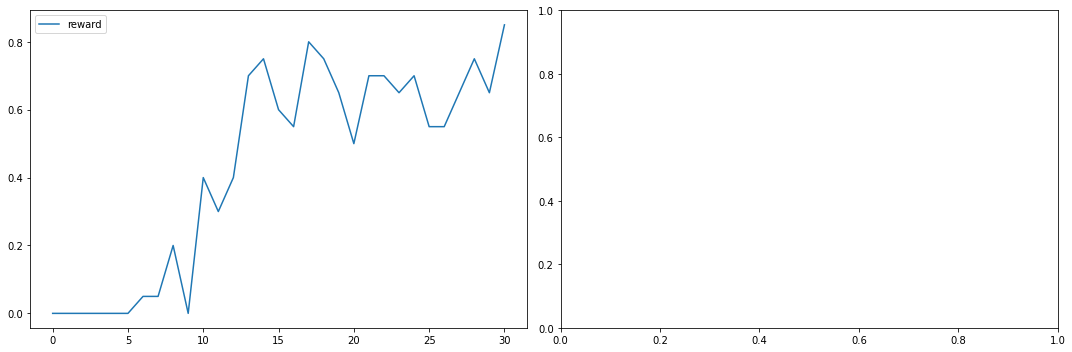

In [4]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(r_cum, label='reward')
axes[0].legend()
fig.tight_layout()

In [5]:
reward_table

defaultdict(float,
            {(0, 0, 4): 0.0,
             (4, 3, 4): 0.0,
             (4, 2, 8): 0.0,
             (8, 2, 4): 0.0,
             (4, 3, 5): 0.0,
             (0, 2, 0): 0.0,
             (0, 1, 0): 0.0,
             (0, 0, 0): 0.0,
             (0, 3, 0): 0.0,
             (0, 1, 1): 0.0,
             (1, 0, 1): 0.0,
             (1, 2, 1): 0.0,
             (1, 0, 0): 0.0,
             (0, 2, 1): 0.0,
             (1, 2, 5): 0.0,
             (4, 1, 8): 0.0,
             (8, 2, 9): 0.0,
             (9, 0, 13): 0.0,
             (13, 0, 13): 0.0,
             (13, 2, 9): 0.0,
             (9, 1, 8): 0.0,
             (8, 0, 12): 0.0,
             (0, 2, 4): 0.0,
             (4, 0, 0): 0.0,
             (0, 1, 4): 0.0,
             (4, 2, 5): 0.0,
             (8, 2, 12): 0.0,
             (1, 1, 0): 0.0,
             (4, 3, 0): 0.0,
             (0, 3, 1): 0.0,
             (1, 3, 2): 0.0,
             (2, 0, 6): 0.0,
             (6, 2, 7): 0.0,
             (4, 0

In [6]:
value_table

defaultdict(float,
            {(4, 0): 0.08776286798715065,
             (4, 1): 0.06753290668209433,
             (4, 2): 0.056170256679775654,
             (4, 3): 0.04345901050898748,
             (0, 0): 0.06645827385860988,
             (0, 1): 0.06512555076839617,
             (0, 2): 0.06375311680316177,
             (0, 3): 0.05799080609266375,
             (1, 0): 0.04408726562757933,
             (1, 1): 0.03990775970553717,
             (1, 2): 0.04134660359863642,
             (1, 3): 0.05913987119205708,
             (5, 0): 0.0,
             (5, 1): 0.0,
             (5, 2): 0.0,
             (5, 3): 0.0,
             (2, 0): 0.07168989985196568,
             (2, 1): 0.06598051338269206,
             (2, 2): 0.07120965701398818,
             (2, 3): 0.055202176282476964,
             (6, 0): 0.10625281142620113,
             (6, 1): 0.04582176070464763,
             (6, 2): 0.09688350569361745,
             (6, 3): 0.030724242793699577,
             (3, 0): 0.03411425370

In [7]:
transit_table

defaultdict(collections.Counter,
            {(0, 0): Counter({4: 2126, 0: 4259}),
             (4, 3): Counter({4: 42, 5: 46, 0: 31}),
             (4, 2): Counter({8: 34, 5: 44, 0: 49}),
             (8, 2): Counter({4: 53, 9: 49, 12: 37}),
             (0, 2): Counter({0: 199, 1: 188, 4: 176}),
             (0, 1): Counter({0: 126, 1: 125, 4: 151}),
             (0, 3): Counter({0: 249, 1: 99}),
             (1, 0): Counter({1: 41, 0: 57, 5: 29}),
             (1, 2): Counter({1: 51, 5: 43, 2: 51}),
             (4, 1): Counter({8: 58, 4: 58, 5: 58}),
             (9, 0): Counter({13: 28, 8: 19, 5: 13}),
             (13, 0): Counter({13: 4, 9: 5, 12: 2}),
             (13, 2): Counter({9: 253, 14: 231, 13: 231}),
             (9, 1): Counter({8: 449, 10: 467, 13: 461}),
             (8, 0): Counter({12: 136, 8: 133, 4: 134}),
             (4, 0): Counter({0: 1553, 4: 1521, 8: 1589}),
             (1, 1): Counter({0: 34, 5: 37, 2: 33}),
             (1, 3): Counter({2: 116, 0: 125, 